<h1 style="text-align:Center;">Black Friday Sale Analysis</h1>

<h3>Overview of the Project:</h3>


In this project, a retail company, "ABC Private Limited," aims to predict customer purchase amounts based on customer demographics and product details. The dataset includes information such as age, gender, marital status, city type, and product categories, along with the total purchase amounts from the last month. The main tasks include data preprocessing (handling missing values, outliers, and mapping categorical data), exploratory data analysis (examining purchase distribution and relationships between purchase amounts and factors like age, gender, and occupation), and data visualization. The ultimate goal is to build a predictive model to help the company create personalized offers for customers based on their purchase behavior.

<h5>Let's Dive Into Analysis</h5>

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re                               # regex pattern matching
import os                               # Allows interaction with the operating system

import warnings
warnings.filterwarnings("ignore")       # Ignoring warnings

<h5>Overview of the Data:</h5>

In [2]:
# loading the data and converting it into a dataframe
data = pd.read_csv('train.csv')
data_df = pd.DataFrame(data)

In [3]:
# seeing the topview of the data
data_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
# checking the data info
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
# checking the name of the columns we have in our dataset
data_df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

<h5>Data Cleaning:</h5>

In [5]:
# checking the count of duplicate values we have
data_df.duplicated().value_counts()

False    550068
Name: count, dtype: int64

In [9]:
#Converting the all column's name into lowercase for easy use
data_df.rename(columns=str.lower,inplace=True)
data_df.columns

Index(['user_id', 'product_id', 'gender', 'age', 'occupation', 'city_category',
       'stay_in_current_city_years', 'marital_status', 'product_category_1',
       'product_category_2', 'product_category_3', 'purchase'],
      dtype='object')

<h4>Processing each column individually:</h4>

In [10]:
# It is nothing but a unique customer's id.
data_df.user_id

0         1000001
1         1000001
2         1000001
3         1000001
4         1000002
           ...   
550063    1006033
550064    1006035
550065    1006036
550066    1006038
550067    1006039
Name: user_id, Length: 550068, dtype: int64

In [8]:
# checking if the column has any null value
data_df['user_id'].isnull().value_counts()

user_id
False    550068
Name: count, dtype: int64

In [9]:
# checking if the column has any null value
data_df['product_id'].isnull().value_counts()

product_id
False    550068
Name: count, dtype: int64

In [10]:
# checking if the column has any null value
data_df['gender'].isnull().value_counts()

gender
False    550068
Name: count, dtype: int64

In [11]:
# checking the unique values for the gender column
data_df['gender'].unique()

array(['F', 'M'], dtype=object)

In [12]:
# checking the unique values for the age column
data_df['age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [16]:
# in this we are checking the null values as well as getting the length and dtype of the column
data_df['occupation'].unique(),len(data_df['occupation'].unique()),data_df['occupation'].dtype  # we are using the len function because the result is in array format(unique is a numpy function) so we can't count the values with the help of count() so we have to use len() to get the count of the values.

(array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
         5, 14, 13,  6], dtype=int64),
 21,
 dtype('int64'))

occupation:
Contains Occupation information of customers in the form of masked value format.

In [14]:
# checking the unique values for the city-category column
data_df['city_category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [15]:
# checking the unique values for the stay in current city years column
data_df['stay_in_current_city_years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [23]:
# here we are replacing 4+ to 4 and converting the dtype of the column for analysis purpose
data_df.stay_in_current_city_years = data_df.stay_in_current_city_years.replace("4+","4").astype(int)
data_df['stay_in_current_city_years'].unique(),data_df['stay_in_current_city_years'].dtype


(array([2, 4, 3, 1, 0]), dtype('int32'))

We have customer who are staying in city from '0', '1', '2', '3', '4+' years.

We can replace '4+' years to '4' so we can get excat number and we can assume that those customer are belonging to current city from 4 years are staying for more than 4 years in the current city.

In [17]:
# checking the unique values for the marital-status column
data_df['marital_status'].unique()

array([0, 1], dtype=int64)

In [18]:
data_df.head(1)

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370


We have three product categories columns, product_category_1, product_category_2 and product_category_3 is nothing but the different varities of products.

Ex.:

We can assume that <b>product_category_1 having Electronics items, product_category_2 having Cloths & Grarments, product_category_3 and having Grocery.</b>

In [ ]:
# getting the info for product category contains category wise product value
data_df[['product_category_1','product_category_2','product_category_3']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   product_category_1  550068 non-null  int64  
 1   product_category_2  376430 non-null  float64
 2   product_category_3  166821 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 12.6 MB


Notice that product category having NaN values or empty values. Let's try to fill them by seeing another columns info.

In [20]:
data_df.head(5)

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4,0,8,NaN,NaN,7969


See we have two columns Gender and occupation. By seeing these two columns we can analyse that which column giving us a useful values to fill the nan values of product categories.

Example:

&#x2022;By seeing the 'age' column we can analyze that which product category are mostly used by the particular age of customer and we can fill that category value inplace of nan values.<br>
&#x2022;By seeing the 'occupation' column we can analyze that which product category are mostly used by the particular customer depends on their occupation and we can fill that category value inplace of nan values.
In the next steps let's see that which column giving us most useful values.

In [21]:
a = data_df.groupby('age')['product_category_2'].agg(pd.Series.mode)
b = data_df.groupby('age')['product_category_3'].agg(pd.Series.mode)
c = data_df.groupby('occupation')['product_category_2'].agg(pd.Series.mode)
d = data_df.groupby('occupation')['product_category_3'].agg(pd.Series.mode)     # mode gives us the most repeated value

In [22]:
a

age
0-17     4.0
18-25    8.0
26-35    8.0
36-45    8.0
46-50    8.0
51-55    8.0
55+      8.0
Name: product_category_2, dtype: float64

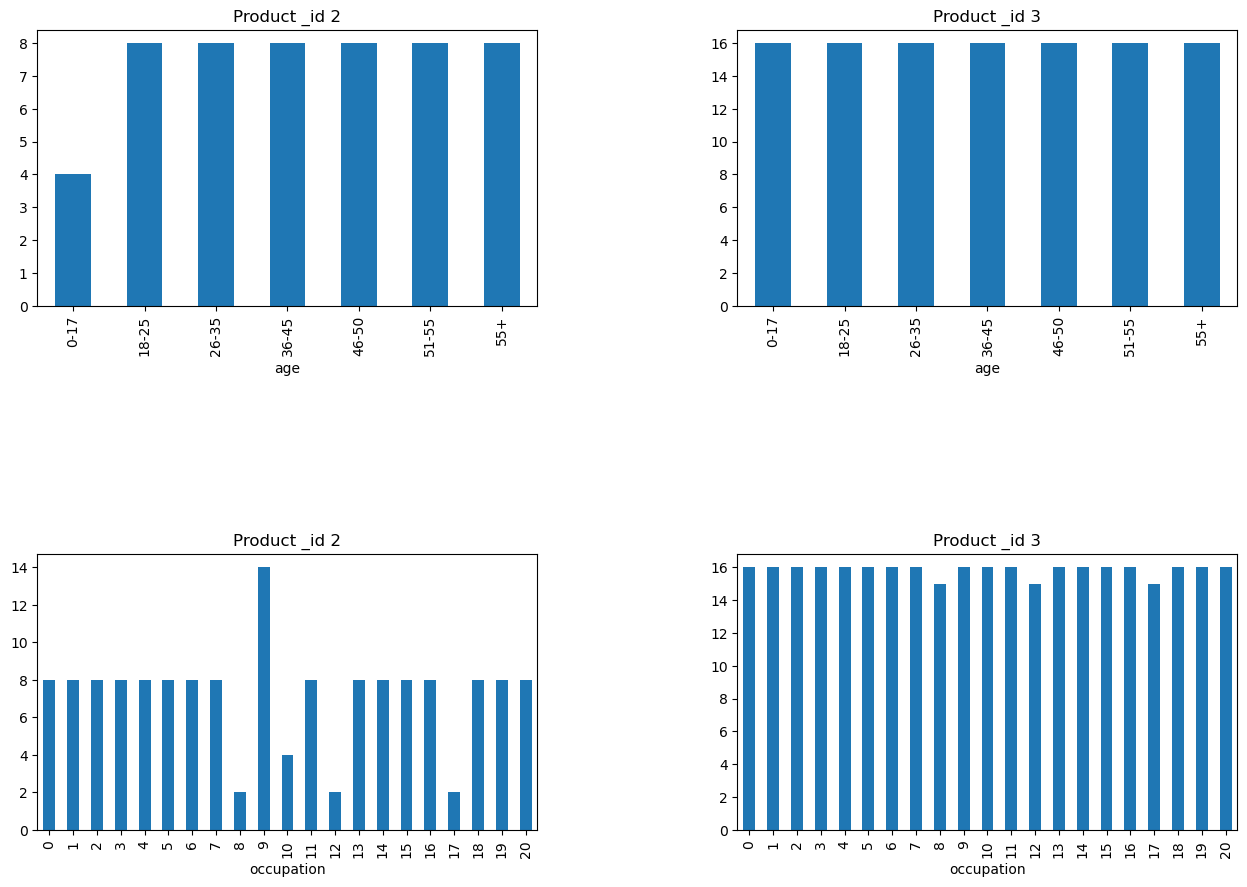

In [23]:
# trying to understand the pattern by plotting graphs
# here we are trying to fill only product_category_2 and product_category_3 NaN values because product_category_1 having 0 NaN values.
plt.figure(figsize=(15,10))
plt.subplots_adjust(left=0.1,right=0.9,top=0.9,bottom=0.1,wspace=0.4,hspace=0.9)    #adjusting the subplots

plt.subplot(2,2,1)
a.plot(kind='bar',title='Product _id 2')

plt.subplot(2,2,2)
b.plot(kind='bar',title='Product _id 3')

plt.subplot(2,2,3)
c.plot(kind='bar',title='Product _id 2')

plt.subplot(2,2,4)
d.plot(kind='bar',title='Product _id 3')

plt.show()

By comparing both 'age' and 'occupation' columns we can see that on the basis of occupation we are getting more and different product_categories which are mostly repeated.

So, we can fill the nan product_category values corresponding to customer occupation.

In the next step to fill this NaN values let's try to write function which we can use for each product_category.

&#x2022;Insted of repeat the code for each product_category we can use code reusability concept here.

In [24]:
def fillNaNValues(category_column):
    x = data_df.groupby('occupation')[category_column].agg(pd.Series.mode)
    for i,j in zip(x.index,x):
        data_df.loc[data_df['occupation']==i,category_column] = data_df.loc[data_df['occupation']==i,category_column].fillna(j)

fillNaNValues('product_category_1')
fillNaNValues('product_category_2')
fillNaNValues('product_category_3')

data_df['product_category_1'] = data_df['product_category_1'].astype(float)

In [25]:
data_df[['product_category_1','product_category_2','product_category_3']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   product_category_1  550068 non-null  float64
 1   product_category_2  550068 non-null  float64
 2   product_category_3  550068 non-null  float64
dtypes: float64(3)
memory usage: 12.6 MB


Here, see we succesfully filled the NaN values with proper data.

In [26]:
# checking the unique values and counting the null values
data_df['purchase'].unique(),data_df['purchase'].isnull().value_counts()

(array([ 8370, 15200,  1422, ...,   135,   123,   613], dtype=int64),
 purchase
 False    550068
 Name: count, dtype: int64)

In [27]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   user_id                     550068 non-null  int64  
 1   product_id                  550068 non-null  object 
 2   gender                      550068 non-null  object 
 3   age                         550068 non-null  object 
 4   occupation                  550068 non-null  int64  
 5   city_category               550068 non-null  object 
 6   stay_in_current_city_years  550068 non-null  int32  
 7   marital_status              550068 non-null  int64  
 8   product_category_1          550068 non-null  float64
 9   product_category_2          550068 non-null  float64
 10  product_category_3          550068 non-null  float64
 11  purchase                    550068 non-null  int64  
dtypes: float64(3), int32(1), int64(4), object(4)
memory usage: 48.3+ MB


In [28]:
# no checking the count of null values for the entire data
data_df.isnull().value_counts()

user_id  product_id  gender  age    occupation  city_category  stay_in_current_city_years  marital_status  product_category_1  product_category_2  product_category_3  purchase
False    False       False   False  False       False          False                       False           False               False               False               False       550068
Name: count, dtype: int64

In [29]:
# having a look at the cleaned data
data_df.head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3.0,4.0,16.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1.0,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12.0,4.0,16.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12.0,14.0,16.0,1057
4,1000002,P00285442,M,55+,16,C,4,0,8.0,8.0,16.0,7969


In [30]:
# saving the file of cleaned data
data_df.to_csv('./Cleaned_BFS_Data.csv')

<h3>Data Visualization</h3>

In [31]:
data_df.head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3.0,4.0,16.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1.0,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12.0,4.0,16.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12.0,14.0,16.0,1057
4,1000002,P00285442,M,55+,16,C,4,0,8.0,8.0,16.0,7969


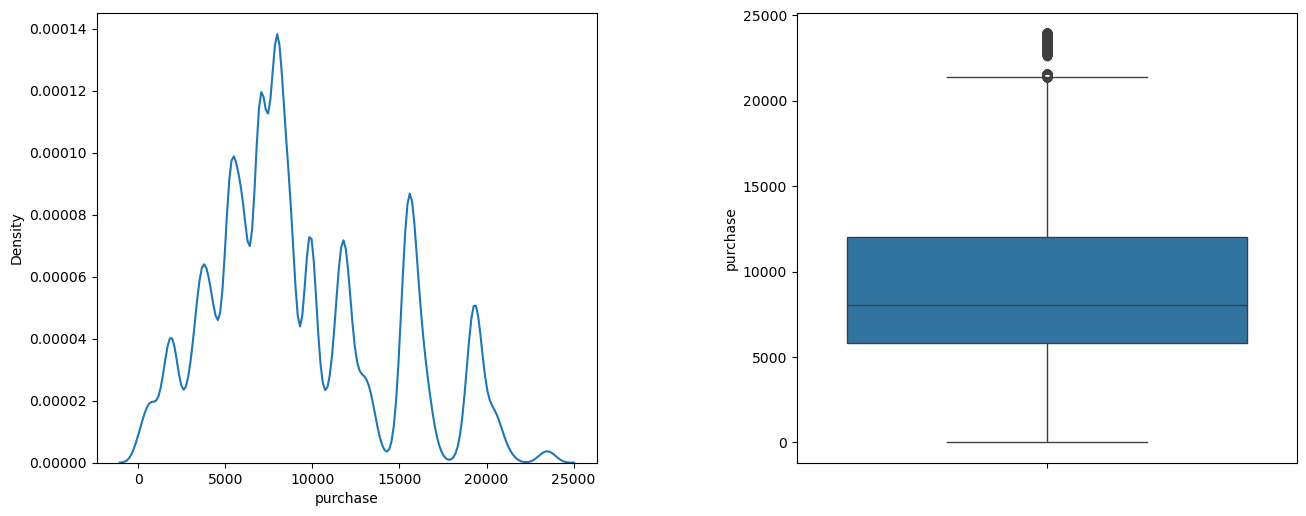

In [32]:
# Check Distribution and Outliers of 'purchase'
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=1,wspace=0.4,hspace=0.4)

plt.subplot(1,2,1)
sns.kdeplot(x='purchase',data=data_df)

plt.subplot(1,2,2)
sns.boxplot(y='purchase',data=data_df)
# sns.scatterplot(y='purchase',markers='o',data=data_df)

plt.show()

We observed that most of the purcahse value is between 5000 to 10000.

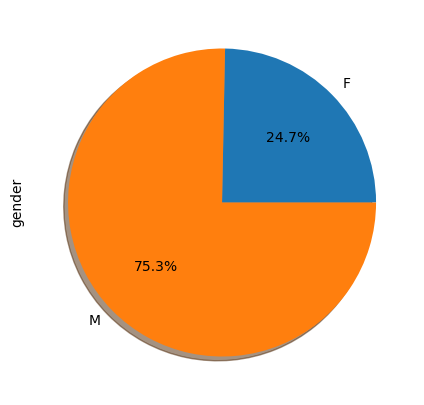

In [33]:
# Find which kind of customer visits more frequently ? Male or Female?{'M','F'}.
data_df.groupby('gender').agg({'gender':'count'}).gender.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),shadow=True)
plt.show()

We see that 75% Male customers visits us frequently.

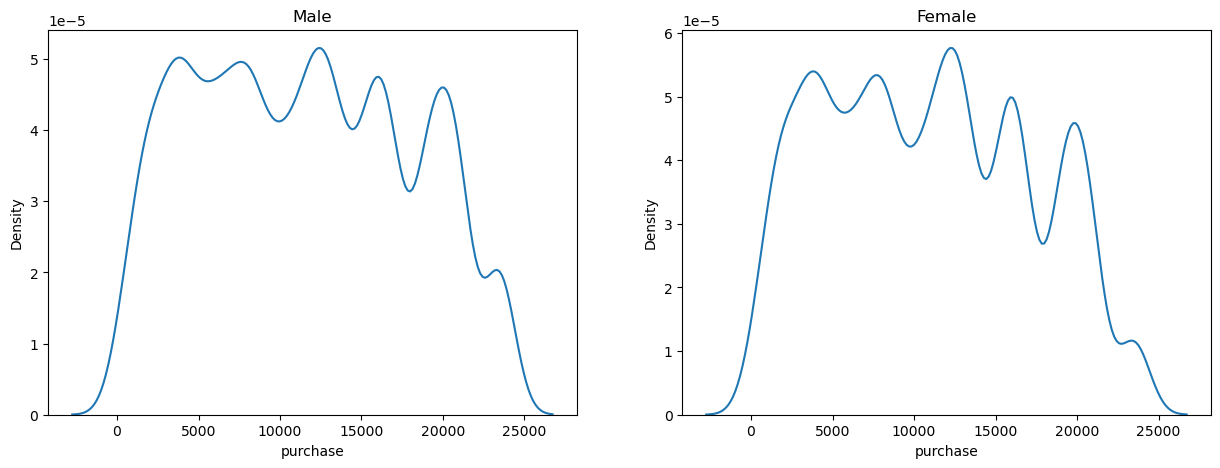

In [34]:
# Purchase Distribution of 'Male' and 'Female' customers
plt.figure(figsize=(15,5))

male = data_df[data_df['gender']=='M'].value_counts('purchase').reset_index()
female = data_df[data_df['gender']=='F'].value_counts('purchase').reset_index()

plt.subplot(1,2,1)
sns.kdeplot(x='purchase',data=male).set_title('Male')

plt.subplot(1,2,2)
sns.kdeplot(x='purchase',data=female).set_title('Female')

plt.show()

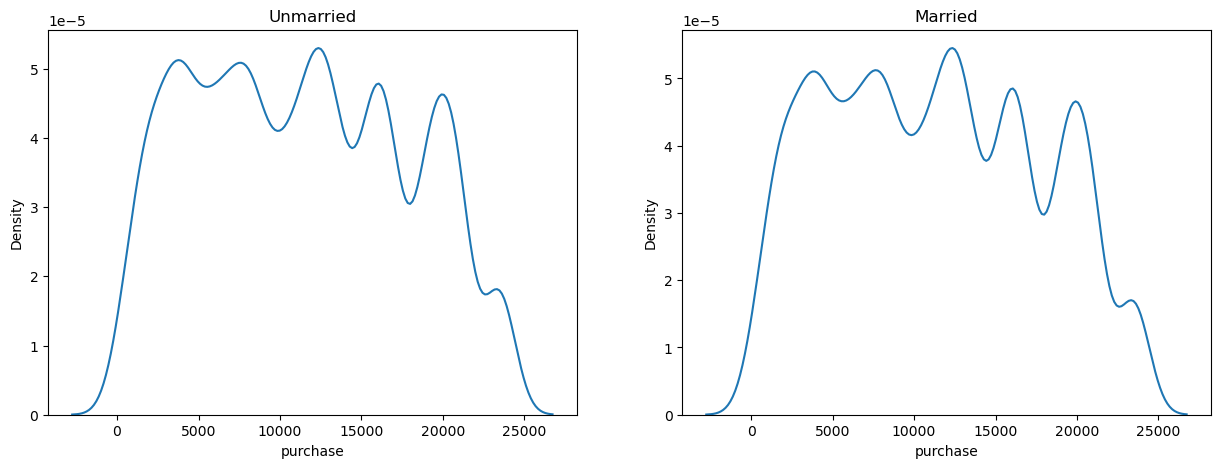

In [35]:
# Purchase Distribution of 'Married' and 'Unmarried' customers
plt.figure(figsize=(15,5))

unmarried = data_df[data_df['marital_status']==0].value_counts('purchase').reset_index()
married = data_df[data_df['marital_status']==1].value_counts('purchase').reset_index()

plt.subplot(1,2,1)
sns.kdeplot(x='purchase',data=unmarried).set_title('Unmarried')

plt.subplot(1,2,2)
sns.kdeplot(x='purchase',data=married).set_title('Married')

plt.show()

  gender    purchase
0      F  1186232642
1      M  3909580100


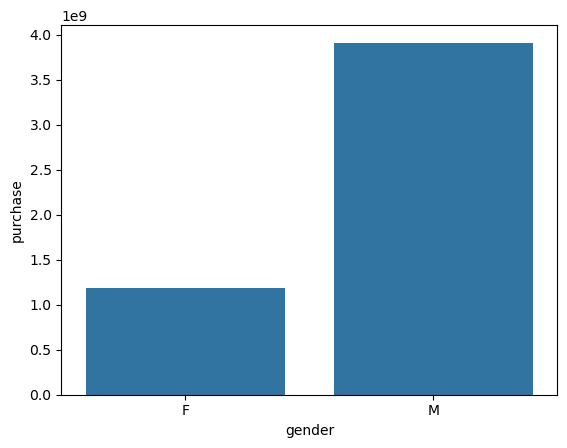

In [36]:
# Find which kind of customer purchasing more ? Male or Female?{'M','F'}
count_purchase = data_df.groupby('gender').agg({'purchase':'sum'}).reset_index()
sns.barplot(x='gender',y='purchase',data=count_purchase)
print(count_purchase)
plt.show()

We observed that 'Male' customers are purchasing more.

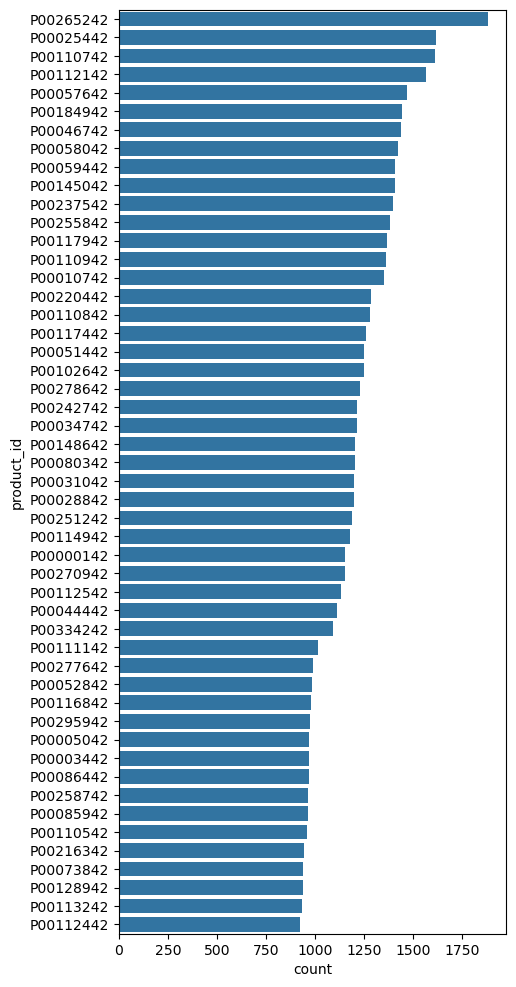

In [24]:
# Find which product is customer buying the most by seeing product_id
fig = plt.gcf()
fig.set_size_inches(5,12)
p_id = data_df['product_id'].value_counts().sort_values(ascending=False).head(50).reset_index()
sns.barplot(x='count',y='product_id',data=p_id)
plt.show()


Here are the 'top 50' product_id's which customers are buying the most.

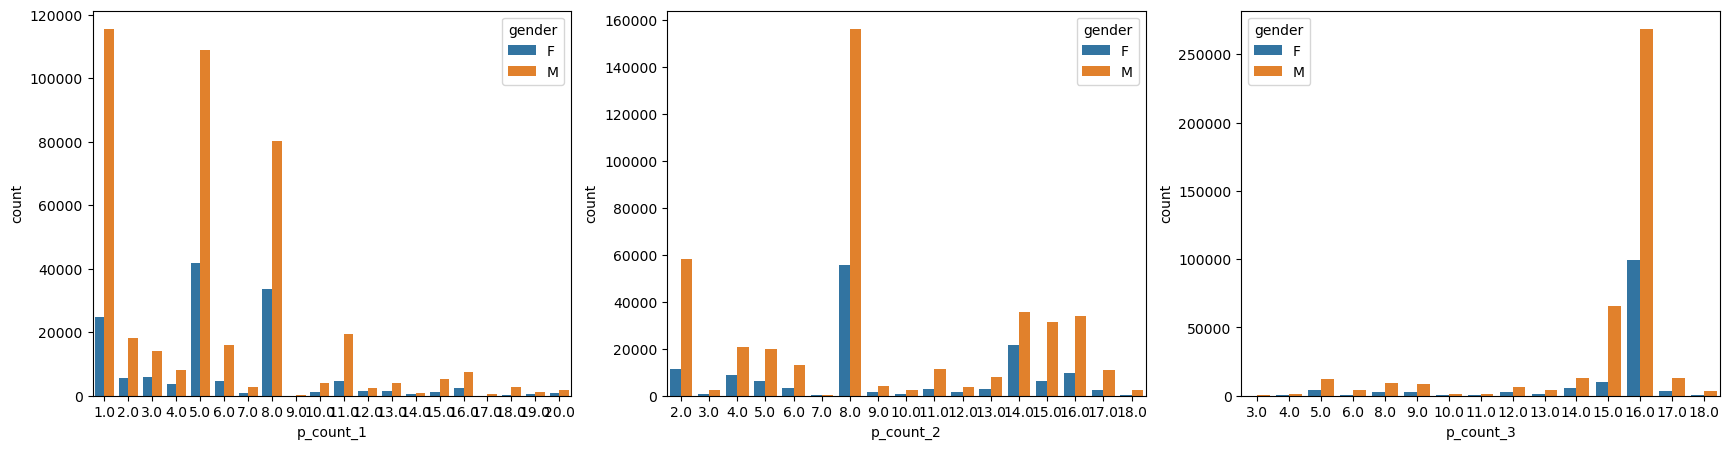

In [38]:
# Find 'sub_product' which is selling most from each product_category and which customer category buying that product most?{'M','F'}

plt.figure(figsize=(21,5))

c1 = data_df.groupby('gender')['product_category_1'].value_counts()
c1_df = pd.DataFrame(c1)
c1_df.rename(columns={'product_category_1':'p_count_1'})
c1_df.reset_index(inplace=True)
c1_df.columns=['gender','p_count_1','count']

c2 = data_df.groupby('gender')['product_category_2'].value_counts()
c2_df = pd.DataFrame(c2)
c2_df.rename(columns={'product_category_2':'p_count_2'})
c2_df.reset_index(inplace=True)
c2_df.columns=['gender','p_count_2','count']

c3 = data_df.groupby('gender')['product_category_3'].value_counts()
c3_df = pd.DataFrame(c3)
c3_df.rename(columns={'product_category_3':'p_count_3'})
c3_df.reset_index(inplace=True)
c3_df.columns=['gender','p_count_3','count']

plt.subplot(1,3,1)
sns.barplot(x='p_count_1',y='count',hue='gender',data=c1_df)

plt.subplot(1,3,2)
sns.barplot(x='p_count_2',y='count',hue='gender',data=c2_df)

plt.subplot(1,3,3)
sns.barplot(x='p_count_3',y='count',hue='gender',data=c3_df)

plt.show()


Here we can see, we have three product_categories and on x-axis we having some values that are nothing but sub_products of that product_category in masked format.

The graph showing that the sub_product count and the two colors bar are showing that the customer category count which are buying that product.

We observed that there are some sub_product's selling count is high and most of the 'Male' customers buying that product.

   marital_status   count
0               0  324731
1               1  225337


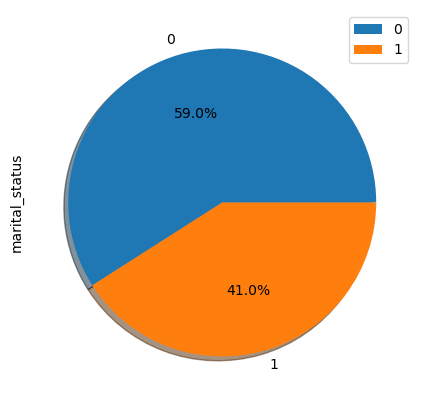

In [53]:
# Find which customer visits more frequently ? UnMarried or Married? {'UnMarried': 0, 'Married': 1}
count_on_marital_status = data_df.groupby('marital_status').agg({'marital_status':'count'}).marital_status.plot(kind='pie',autopct='%1.1f%%',label='marital_status',figsize=(5,5),shadow=True)
plt.legend()

count_visiters = data_df.groupby('marital_status').agg({'marital_status':'count'})
count_visiters.columns = ['count']
count_visiters.reset_index(inplace=True)
print(count_visiters)
plt.show()

We observed that 'Unmarried' customers are visiting us frequently. And we have 'Married' customer in large amount as well.



   marital_status gender    purchase
0               0      F   684154127
1               0      M  2324773320
2               1      F   502078515
3               1      M  1584806780


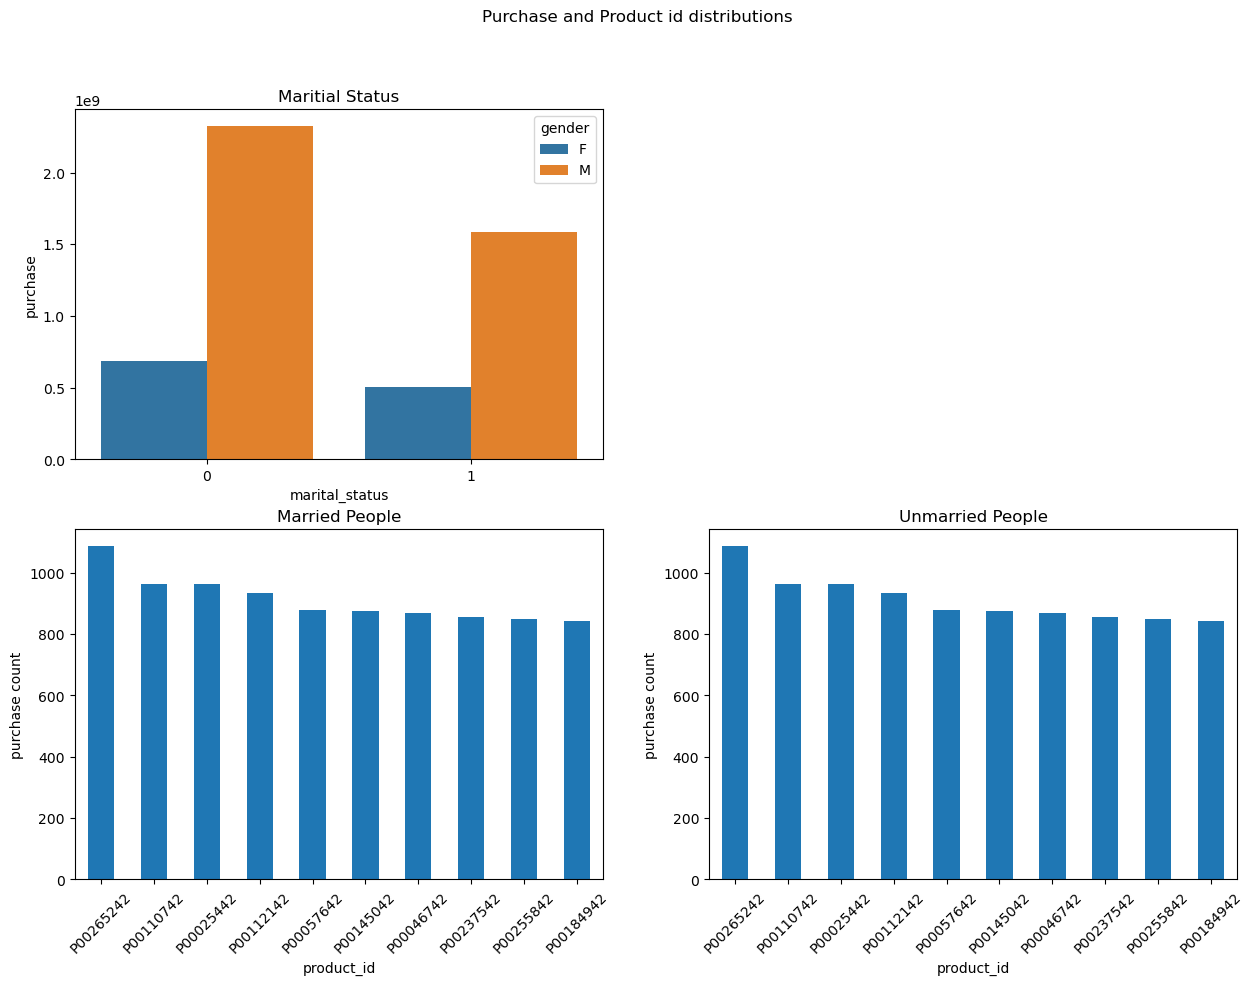

In [76]:
# Find which customer purchasing more (Married or UnMarried) and Top 10 products purcahsed by them
plt.figure(figsize=(15,10))
M_and_UM = data_df.groupby(['marital_status','gender']).agg({'purchase':'sum'}).reset_index()
print(M_and_UM)

M = data_df[data_df['marital_status']==0].value_counts('product_id').nlargest(10)

UM = data_df[data_df['marital_status']==1].value_counts('product_id').nlargest(10)

plt.subplot(2,2,1)
sns.barplot(x='marital_status',y='purchase',hue='gender',data=M_and_UM).set_title('Maritial Status')

plt.subplot(2,2,3)
M.plot(x=M.index,y=M,kind='bar',ylabel='purchase count',title='Married People')
plt.xticks(rotation=45)

plt.subplot(2,2,4)
M.plot(x=UM.index,y=UM,kind='bar',ylabel='purchase count',title='Unmarried People')
plt.xticks(rotation=45)

# plt.tight_layout()
plt.suptitle('Purchase and Product id distributions')
plt.show()

In the above plot we can see that 'Unmarried' customers are purchasing more than the 'Married' customers.

And Bar Plot showing that top 10 Product Id's purchased by them frequently.

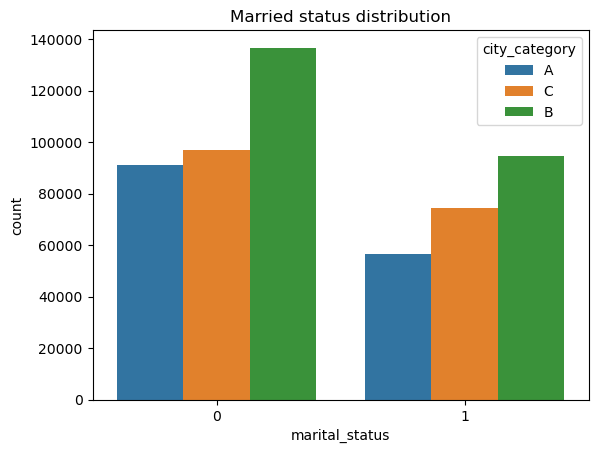

In [82]:
# count the value of 'Married' and 'Unmarried' customers based on city category
sns.countplot(x='marital_status',hue='city_category',data=data_df)
plt.title('Married status distribution')
plt.show()


The plot shows that unmarried customers are more prevalent across all city categories, with City B having the highest counts for both unmarried and married customers, while City A has the fewest married individuals.

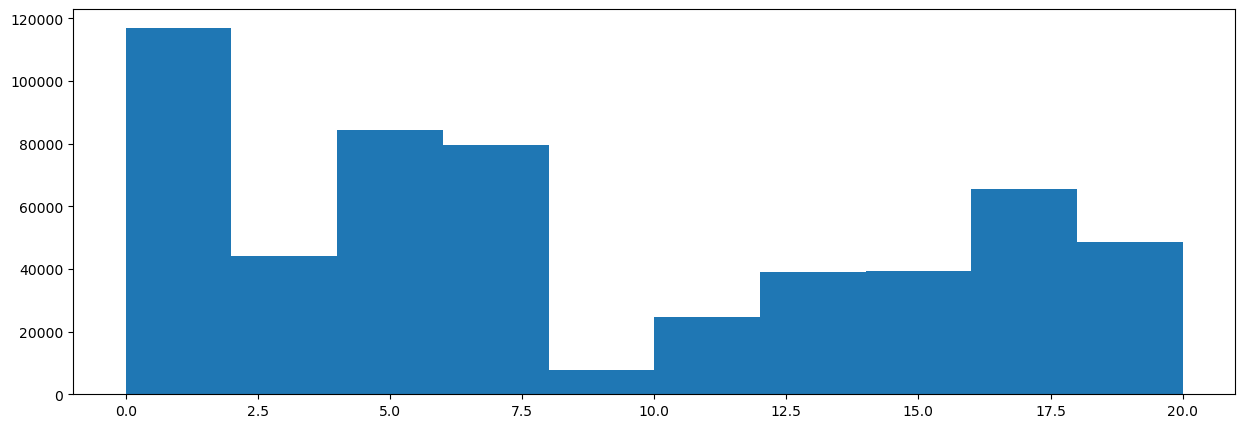

In [28]:
# displays the distribution of the "occupation"
# sns.histplot(x='occupation',data=data_df)
plt.figure(figsize=(15,5))
plt.hist(x='occupation',data=data_df)
plt.show()


The histogram shows an uneven distribution of occupations, with some occupations (especially near the lower end) having significantly more individuals than others.

<h4>Conclusion:</h4>

In this project for ABC Private Limited, we analyzed customer purchase behavior using demographic and product data to predict the purchase amount for different products. After preprocessing the data (handling missing values, transforming categorical variables, etc.), we conducted exploratory data analysis (EDA) to understand key factors like age, gender, occupation, and city type, and their relationships with purchase amounts. Based on these insights, the model we developed will help the company offer personalized promotions to customers, enhancing targeted marketing efforts and potentially increasing sales.